# Linear Matrix Scrambling and Digital Shift for Halton

In Halton, each dimension has a prime number associated to it: 2 is associated to dimension 1, 3 to dimension 2, 5 to dimension 3 and so on. These prime numbers are referred as bases.

### Here we explain Linear Matrix Scrambling:

Based on the bases, a different scrambling matrix is generated for each dimension where the lower triangle is random between 0 and (base - 1), the diagonal is random between 1 and (base - 1), and the upper triangle has all zeros. For each dimension, we convert the indices to their log base representations, compute their dot product with the scrambling matrix, and convert them to decimal (base 10) to generate our samples.

### Here we explain Digital Shift: 

Based on the bases, a different vector is generated for each dimension which is random between 0 and (base - 1). For each dimension, we convert the indices to their log base representations, add them to the vector , and convert them to decimal (base 10) to generate our samples.

### Here we explain Linear Matrix Scrambling Combined with Digital Shift:

In this option, we implement the Linear Matrix Scrambling of Halton but before converting to base 10, we apply the Digital Shift to the scrambled coefficients (the dot product of the log base representations of the indices with the scrambling matrix), and then convert to base 10.

### Here we set up the QMCPY environment:

In [15]:
import qmcpy as qp

### Here we explain the parameters of the init function:

In [16]:
help(qp.Halton().__init__)

Help on method __init__ in module qmcpy.discrete_distribution.halton:

__init__(dimension=1, randomize=True, generalize=True, seed=None) method of qmcpy.discrete_distribution.halton.Halton instance
    Args:
        dimension (int or ndarray): dimension of the generator. 
            If an int is passed in, use sequence dimensions [0,...,dimensions-1].
            If a ndarray is passed in, use these dimension indices in the sequence. 
        randomize (str/bool): select randomization method from 
            'QRNG"   [1], (max dimension = 360, supports generalize=True, default if randomize=True) or 
            'OWEN'   [2], (max dimension = 1000) or
            'LMS'    [3], (max dimension = 1000) or
            'DS'     [4], (max dimension = 1000) or
            'LMS_DS' [5], (max dimension = 1000)
        generalize (bool): generalize flag, only applicable to the QRNG generator
        seed (None or int or numpy.random.SeedSeq): seed the random number generator for reproducibility

### Here we explain the parameters of the gen_samples function:

In [17]:
help(qp.Halton().gen_samples)

Help on method gen_samples in module qmcpy.discrete_distribution.halton:

gen_samples(n=None, n_min=0, n_max=8, warn=True) method of qmcpy.discrete_distribution.halton.Halton instance
    Generate samples
    
    Args:
        n (int): if n is supplied, generate from n_min=0 to n_max=n samples. 
            Otherwise use the n_min and n_max explicitly supplied as the following 2 arguments
        n_min (int): Starting index of sequence.
        n_max (int): Final index of sequence.
    Returns:
        ndarray: (n_max-n_min) x d (dimension) array of samples



### Comparison between LMS, DS, and LMS_DS:

In [18]:
dimension = 2
lms_halton = qp.Halton(dimension, randomize= 'LMS', generalize= False) # Linear Matrix Scrambling
ds_halton = qp.Halton(dimension, randomize= 'DS', generalize= False) # Digital Shift
lms_ds_halton = qp.Halton(dimension, randomize= 'LMS_DS', generalize= False) # Linear Matrix Scrambling Combined with Digital Shift

Here the difference between the three is shown by printing some samples:

In [19]:
print("Samples Generated by Linear Matrix Scrambling: ")
print(lms_halton.gen_samples(8,warn=False))
print("\nSamples Generated by Digital Shift: ")
print(ds_halton.gen_samples(8))
print("\nSamples Generated by Linear Matrix Scrambling Combined with Digital Shift: ")
print(lms_ds_halton.gen_samples(8))

Samples Generated by Linear Matrix Scrambling: 
[[0.         0.        ]
 [0.58428662 0.89316427]
 [0.29270715 0.4529952 ]
 [0.87300241 0.31862573]
 [0.20567119 0.86565374]
 [0.6297161  0.42546209]
 [0.49328654 0.1800019 ]
 [0.92132235 0.73981025]]

Samples Generated by Digital Shift: 
[[0.84507907 0.36498885]
 [0.34507907 0.69832218]
 [0.59507907 0.03165551]
 [0.09507907 0.47609996]
 [0.97007907 0.80943329]
 [0.47007907 0.14276662]
 [0.72007907 0.58721107]
 [0.22007907 0.9205444 ]]

Samples Generated by Linear Matrix Scrambling Combined with Digital Shift: 
[[0.54542874 0.80527297]
 [0.43140187 0.50255198]
 [0.97672964 0.1917172 ]
 [0.12444458 0.71401428]
 [0.74492177 0.44004718]
 [0.35696965 0.01260499]
 [0.80897443 0.98071275]
 [0.167139   0.55724842]]


Here the difference between the three is shown by plotting with more samples:

c:\users\aadit\documents\qmcsoftware\qmcpy\discrete_distribution\halton.py:272


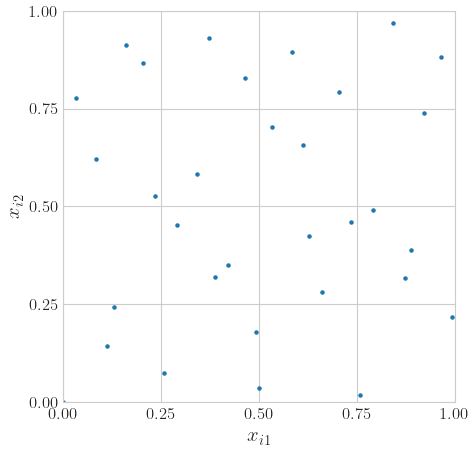

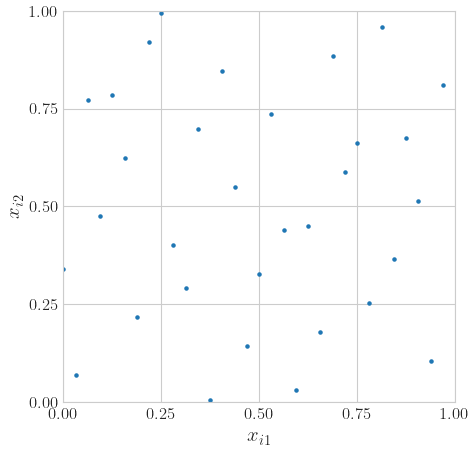

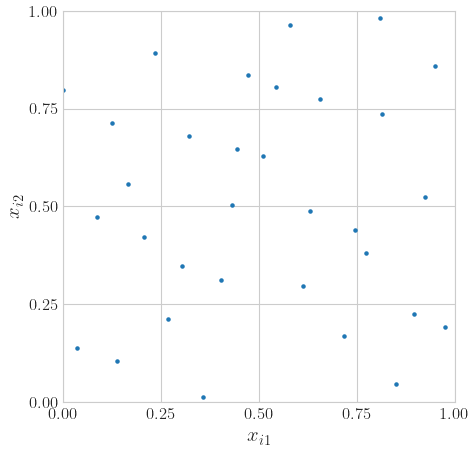

In [20]:
fig1,ax1 = qp.plot_proj(lms_halton, n = 2**5)
fig2,ax2 = qp.plot_proj(ds_halton,n = 2**5)
fig3,ax3 = qp.plot_proj(lms_ds_halton,n = 2**5)

### Examples of Linear Matrix Scrambling with plots:

Here we show a 3-dimensional scrambled Halton:

c:\users\aadit\documents\qmcsoftware\qmcpy\discrete_distribution\halton.py:272


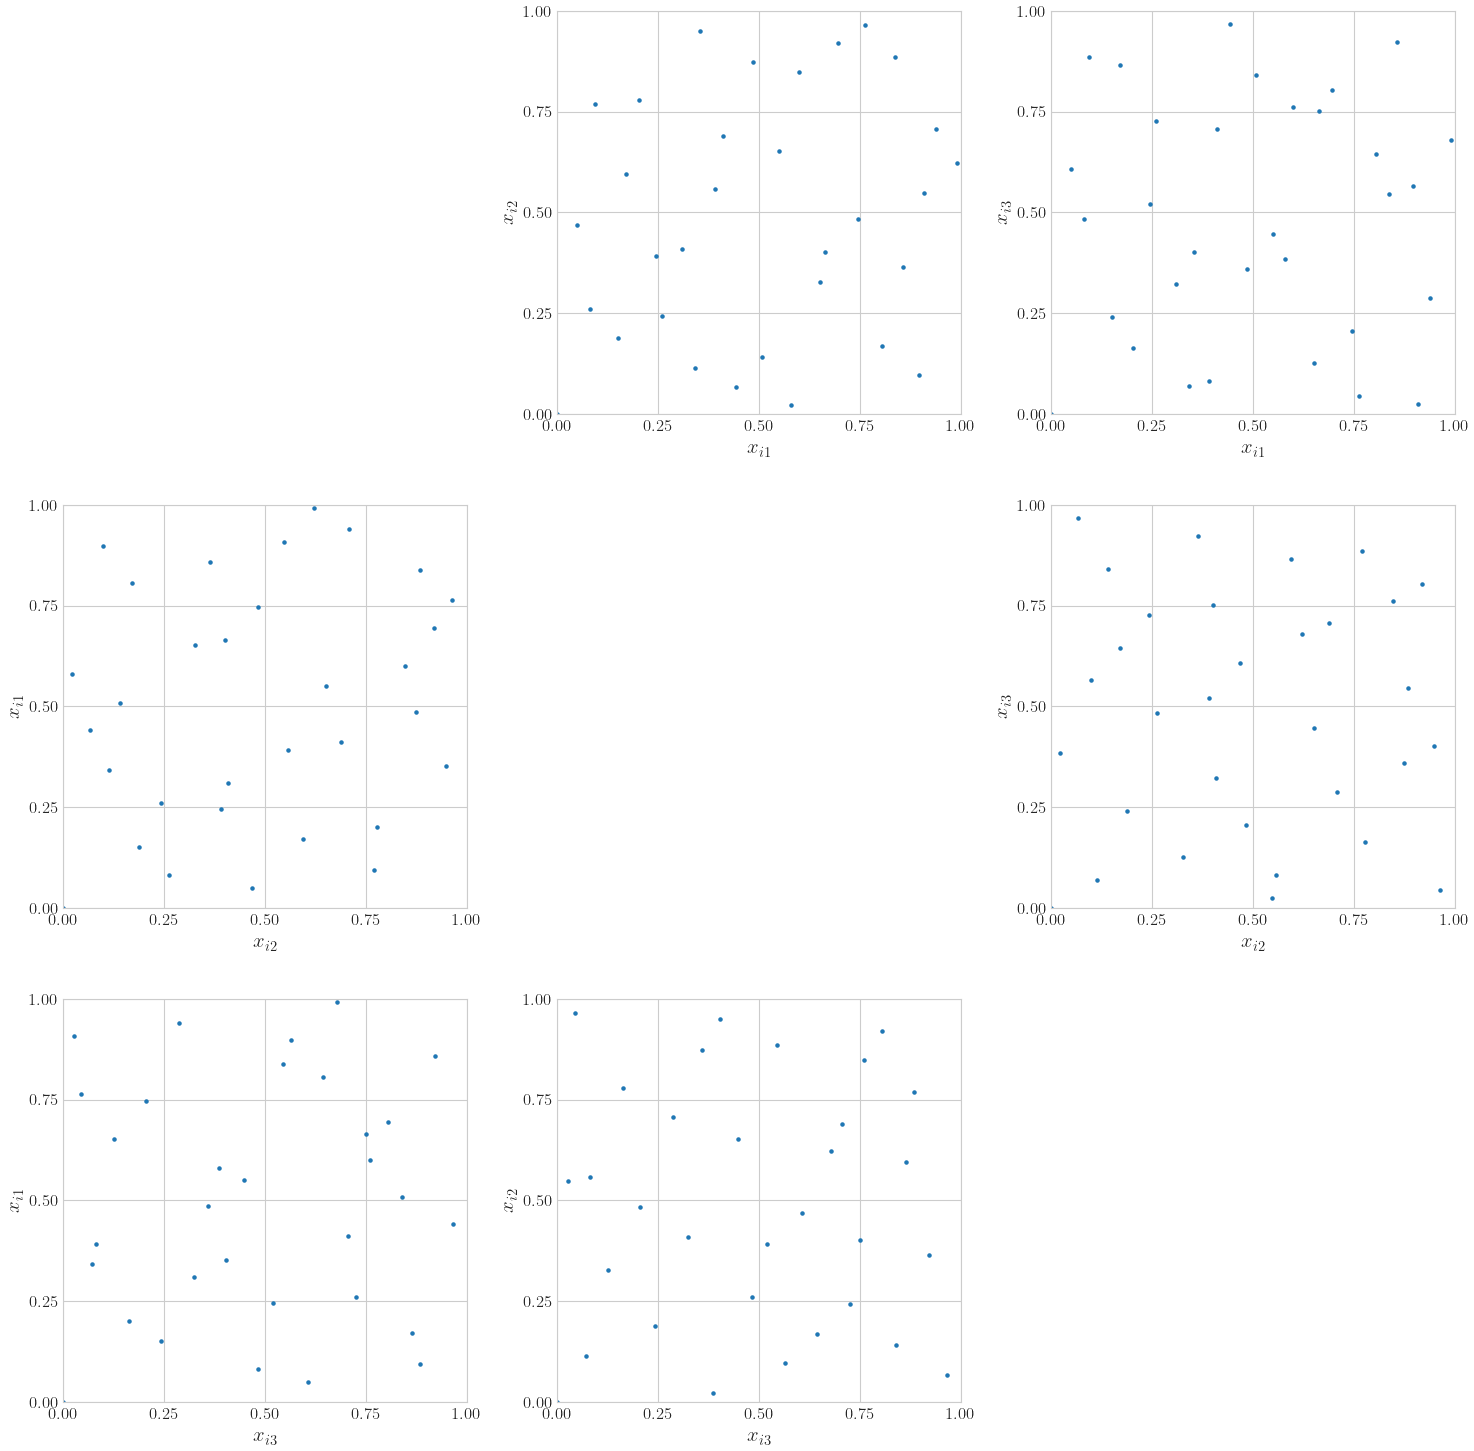

In [21]:
dimension = 3
lms_halton = qp.Halton(dimension, randomize= 'LMS', generalize=False)
fig,ax = qp.plot_proj(lms_halton, n = 2**5, d_horizontal = range(dimension), d_vertical = range(dimension),math_ind = False)

Here we show a 4-dimensional scrambled Halton with successively increasing number of points. The initial points are in blue.  The next additional points are in orange. The final additional points are in green.

c:\users\aadit\documents\qmcsoftware\qmcpy\discrete_distribution\halton.py:272


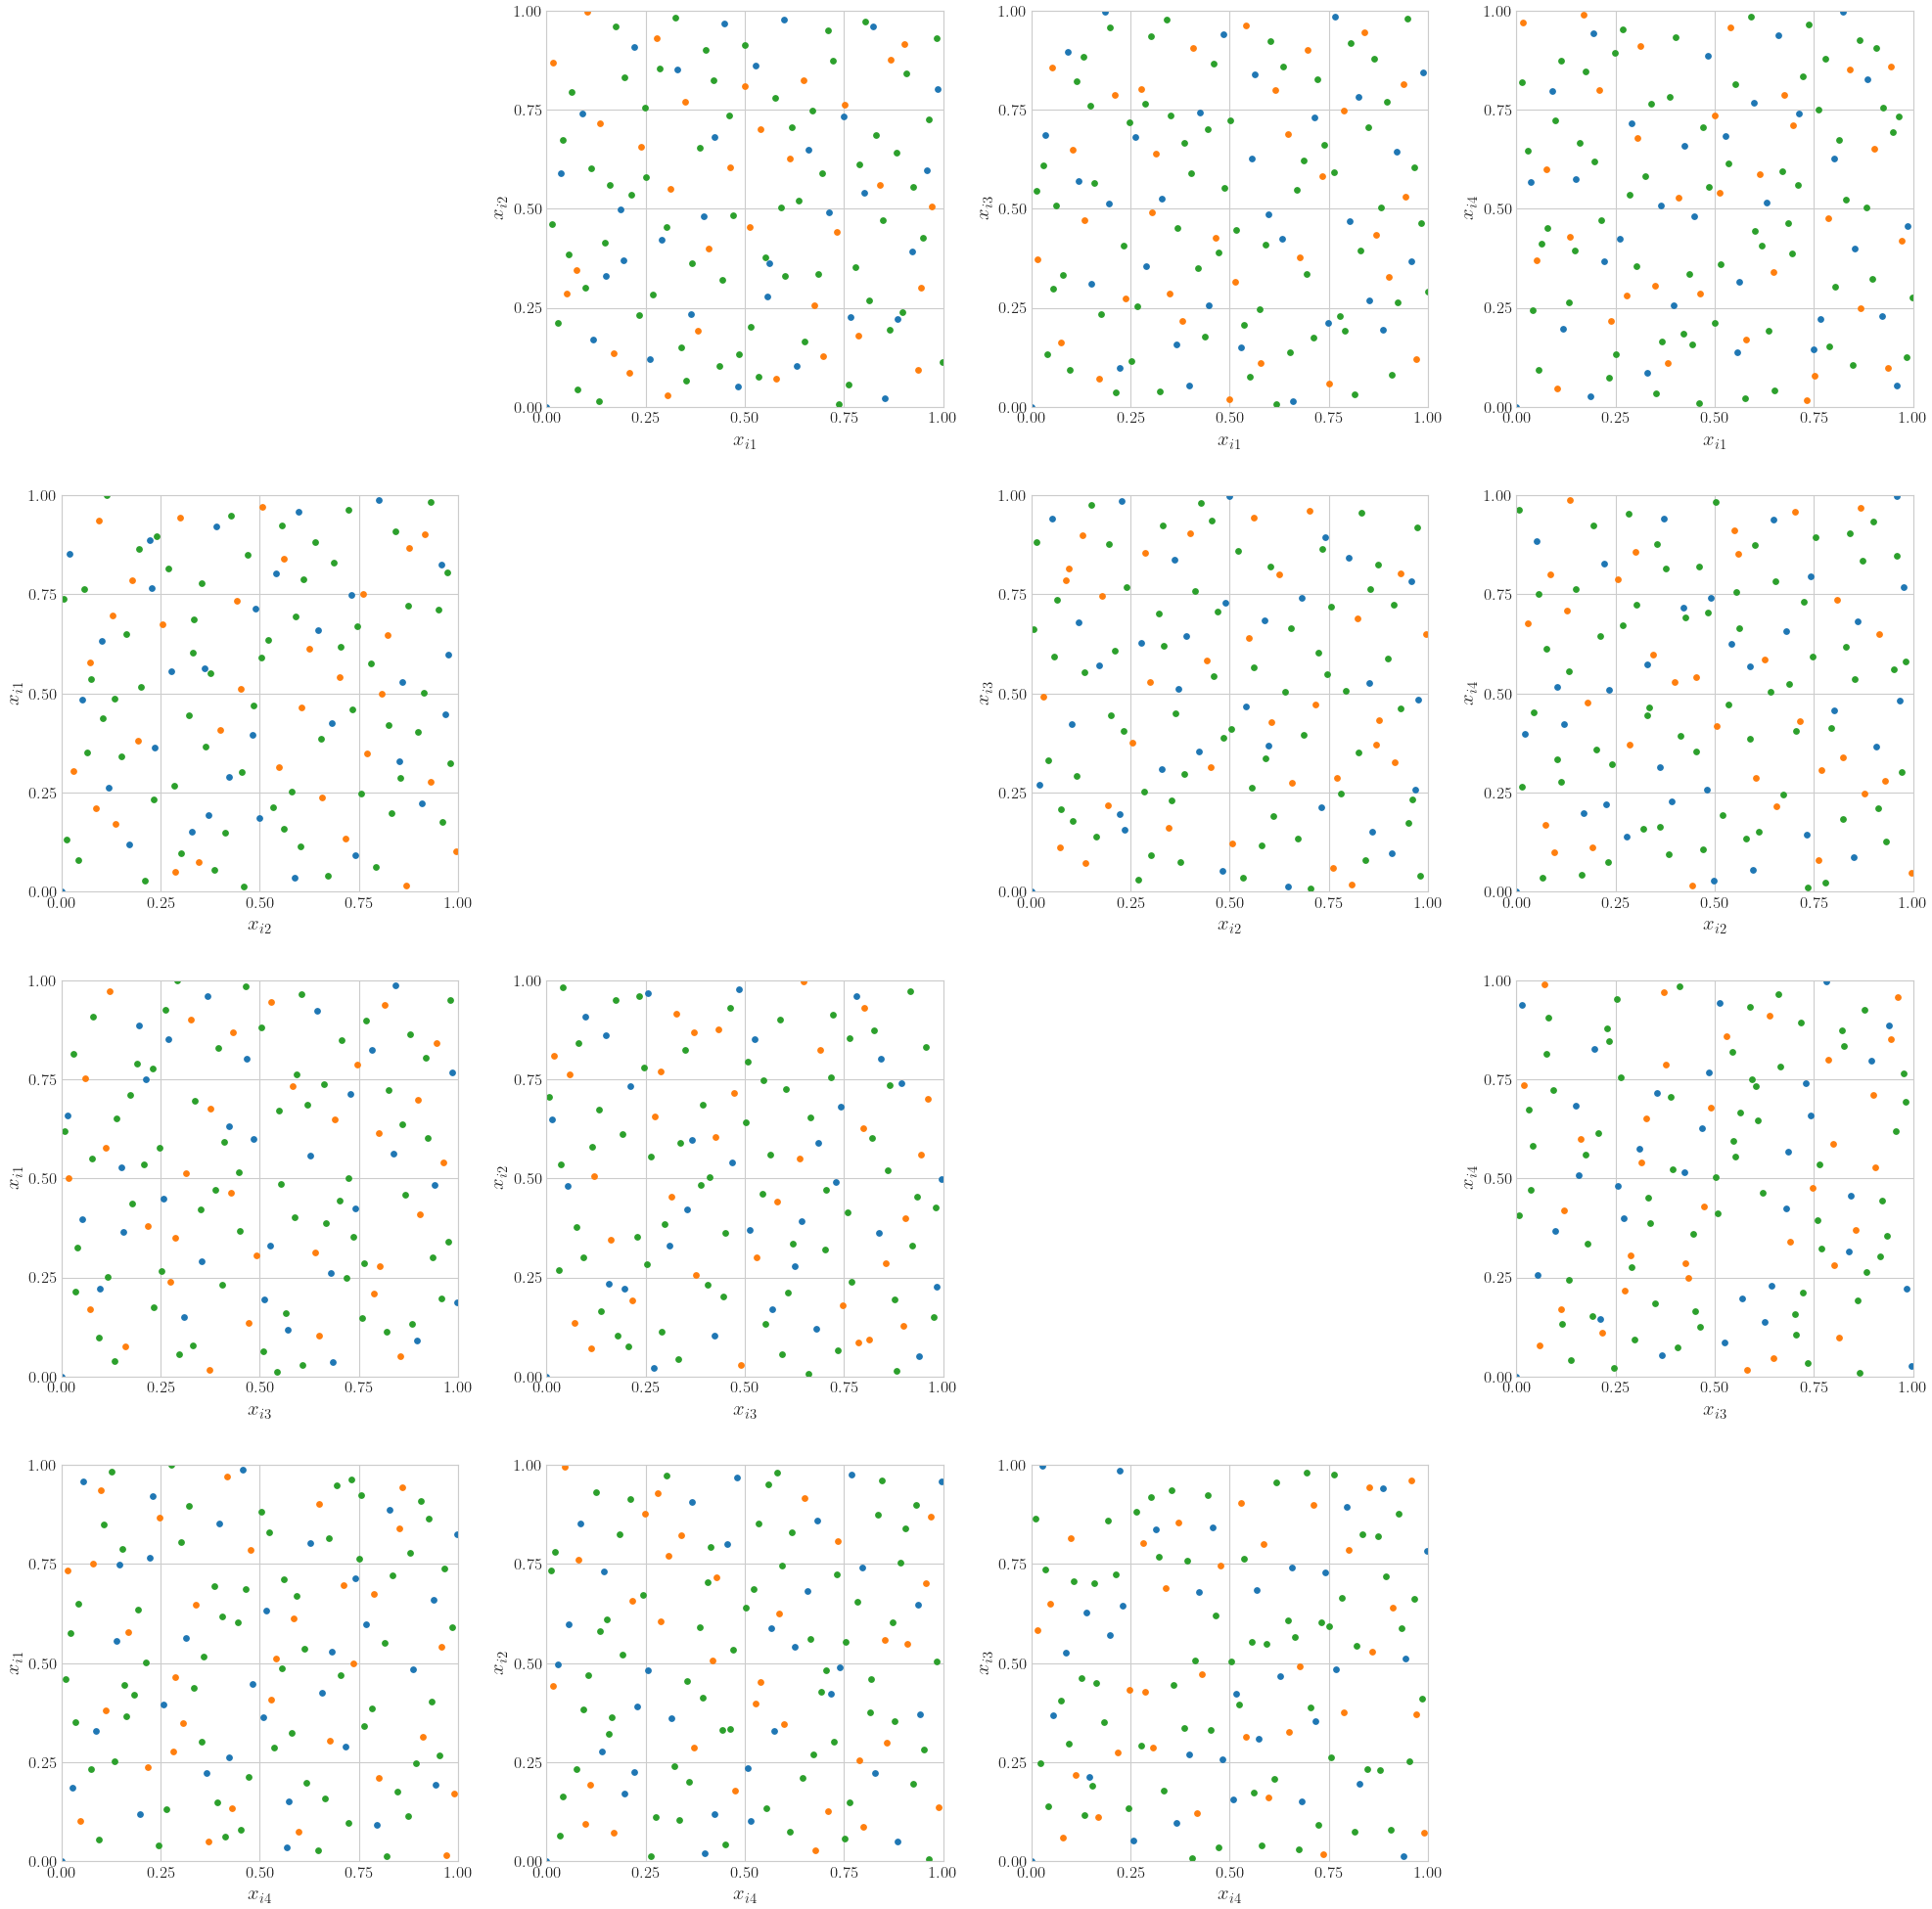

In [22]:
dimension = 4
lms_halton = qp.Halton(dimension, randomize= 'LMS', generalize=False)
fig,ax = qp.plot_proj(lms_halton, n = [2**5,2**6,2**7], d_horizontal = range(dimension), d_vertical = range(dimension),math_ind = False,marker_size = 15)

### Examples of Digital Shifts with plots:

Here we show a 3-dimensional Halton with Digital Shift:

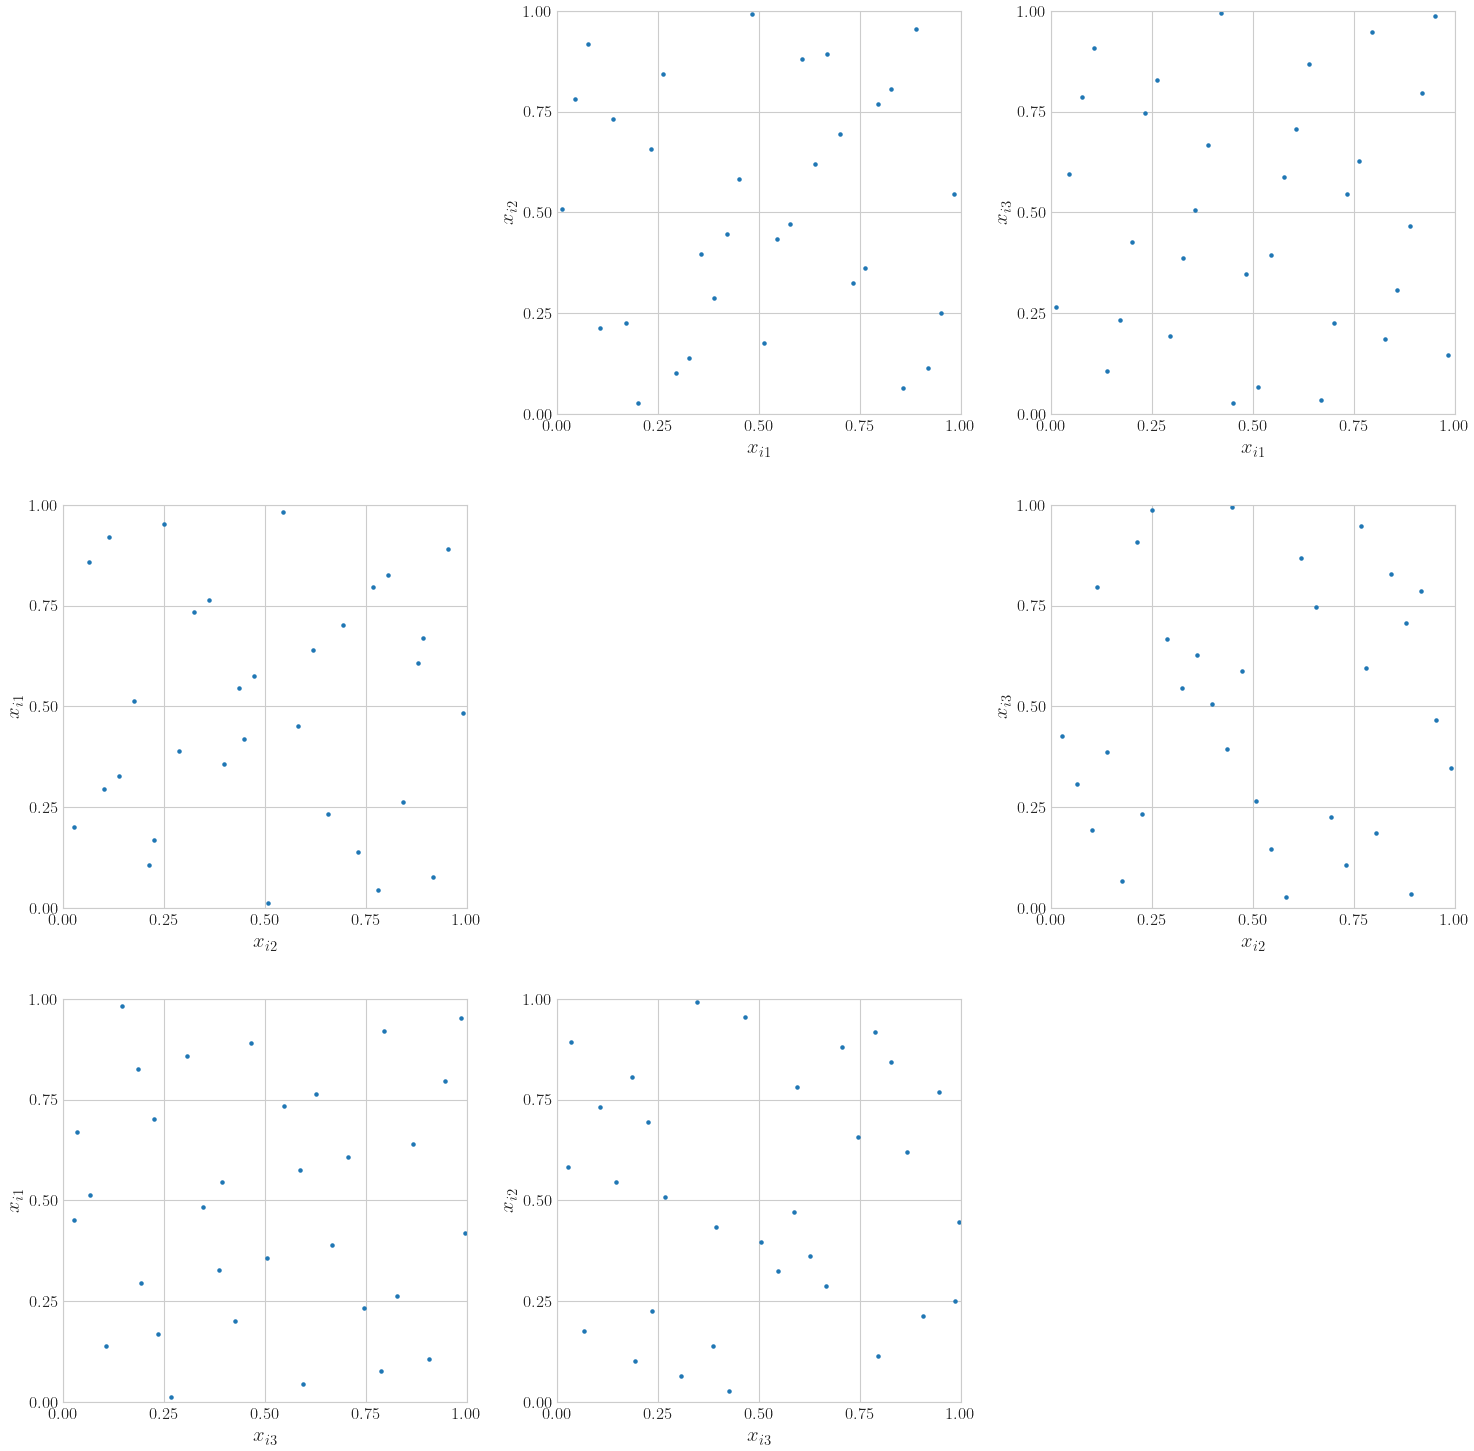

In [23]:
dimension = 3
ds_halton = qp.Halton(dimension, randomize= 'DS', generalize=False)
fig,ax = qp.plot_proj(ds_halton, n = 2**5, d_horizontal = range(dimension), d_vertical = range(dimension),math_ind = False)

Here we show a 4-dimensional Halton with Digital Shift with successively increasing number of points. The initial points are in blue.  The next additional points are in orange. The final additional points are in green.

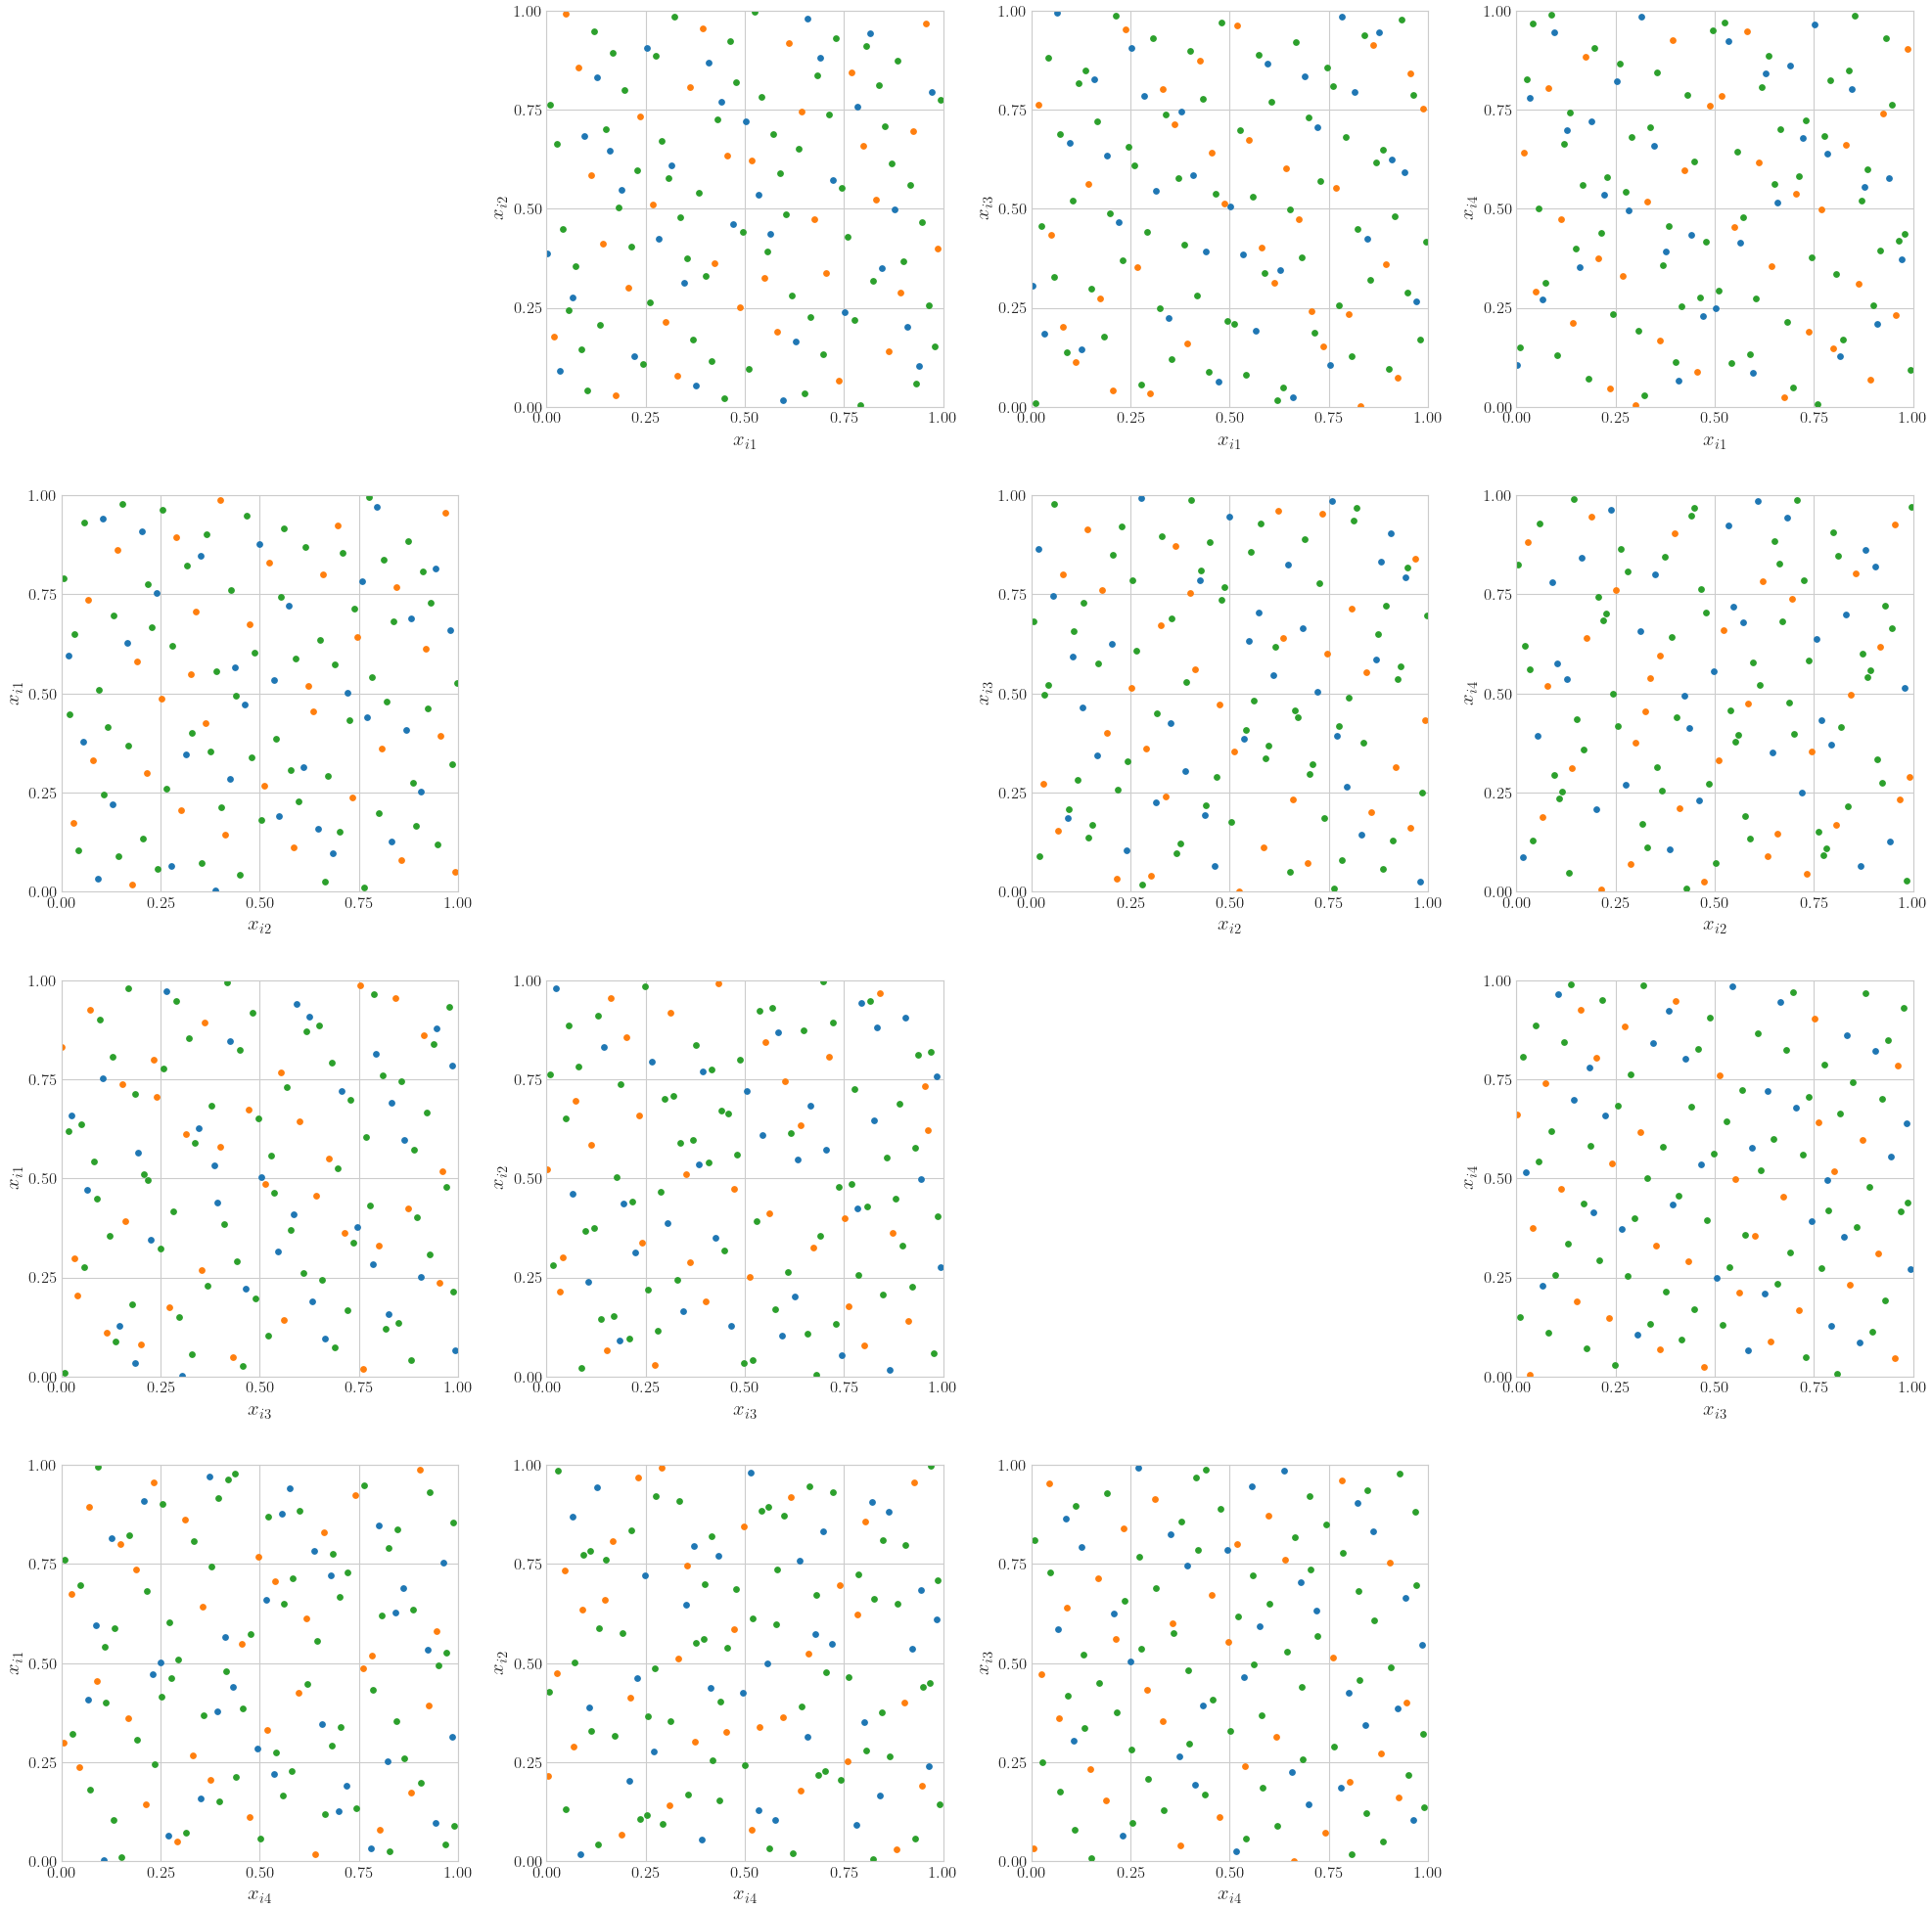

In [24]:
dimension = 4
ds_halton = qp.Halton(dimension, randomize= 'DS', generalize=False)
fig,ax = qp.plot_proj(ds_halton, n = [2**5,2**6,2**7], d_horizontal = range(dimension), d_vertical = range(dimension),math_ind = False,marker_size = 15)

### Examples of Linear Matrix Scrambling Combined with Digital Shift with plots:

Here we show a 3-dimensional Halton with Linear Matrix Scrambling Combined with Digital Shift:

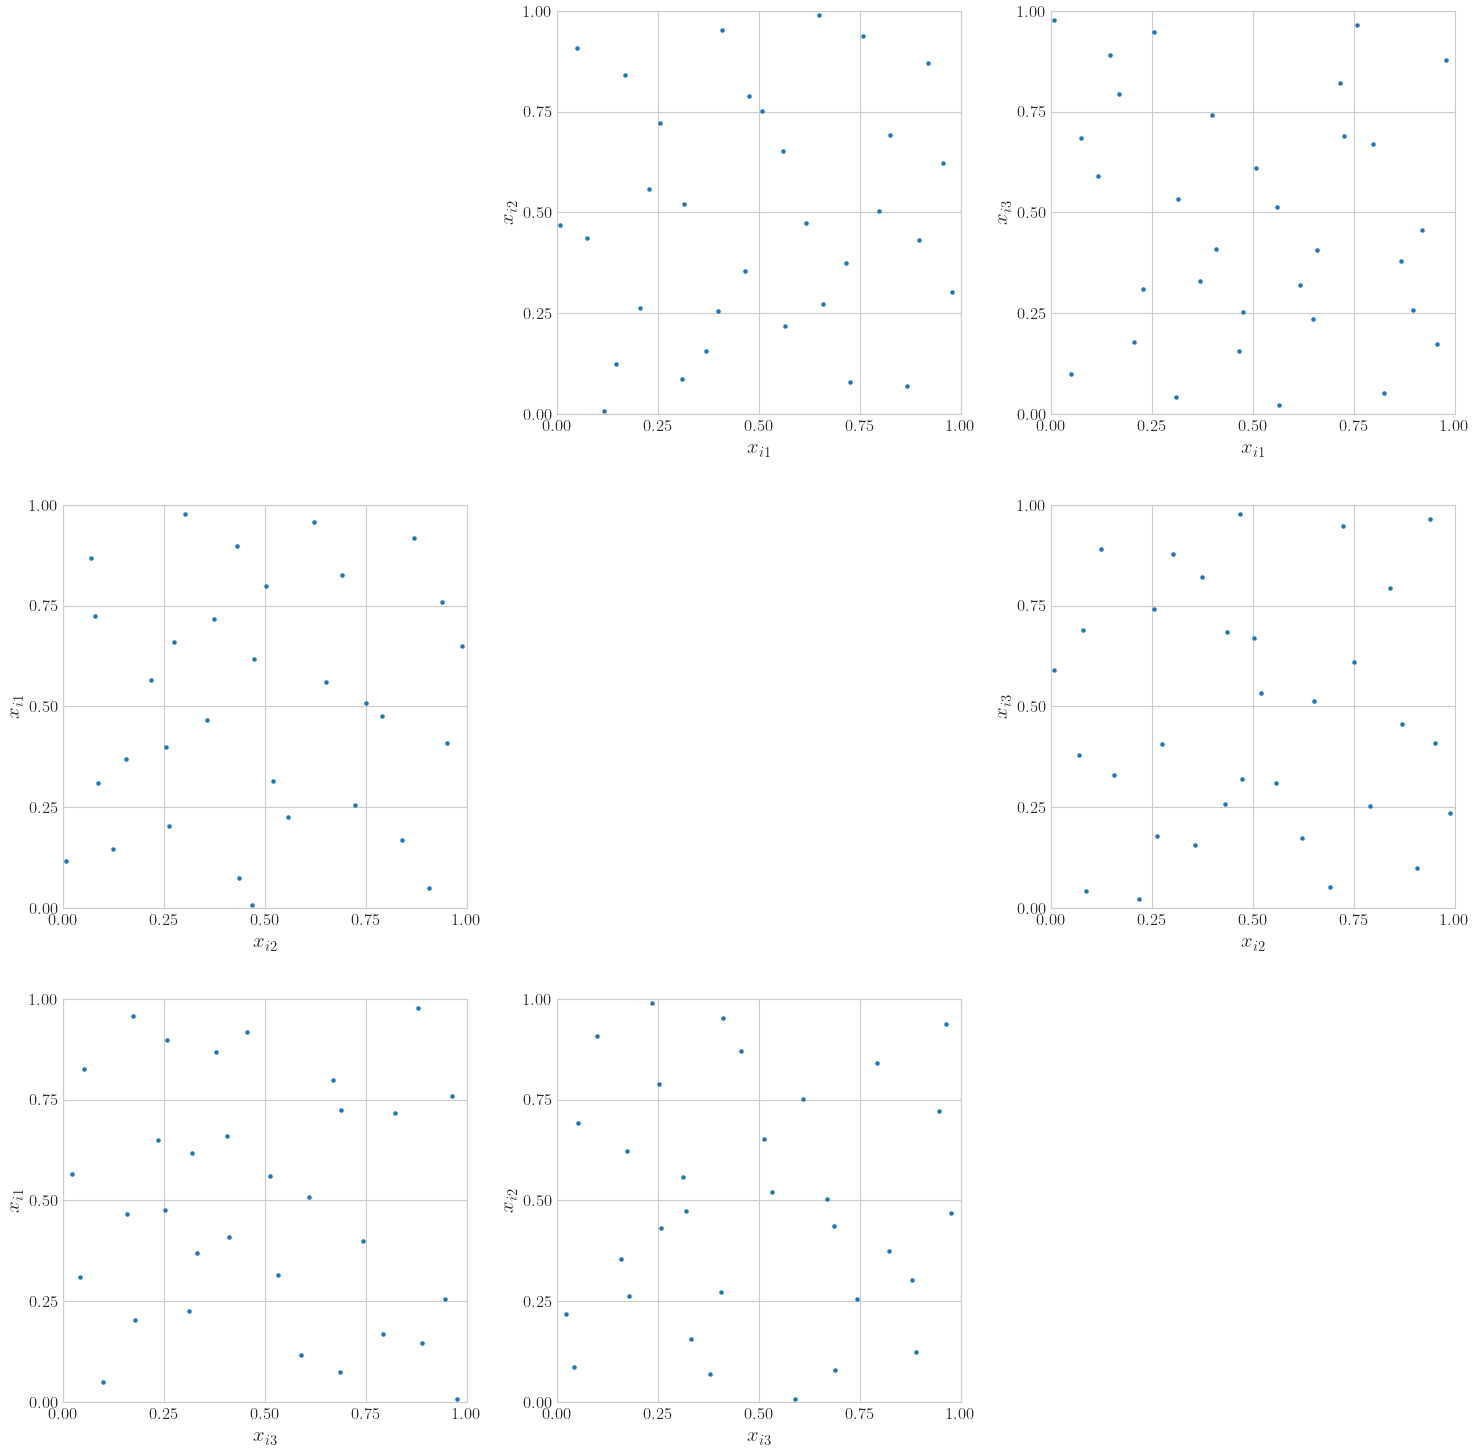

In [25]:
dimension = 3
lms_ds_halton = qp.Halton(dimension, randomize='LMS_DS', generalize=False)
fig,ax = qp.plot_proj(lms_ds_halton, n = 2**5, d_horizontal = range(dimension), d_vertical = range(dimension),math_ind = False)

Here we show a 4-dimensional Halton with Linear Matrix Scrambling combined with Digital Shift with successively increasing number of points. The initial points are in blue.  The next additional points are in orange. The final additional points are in green.

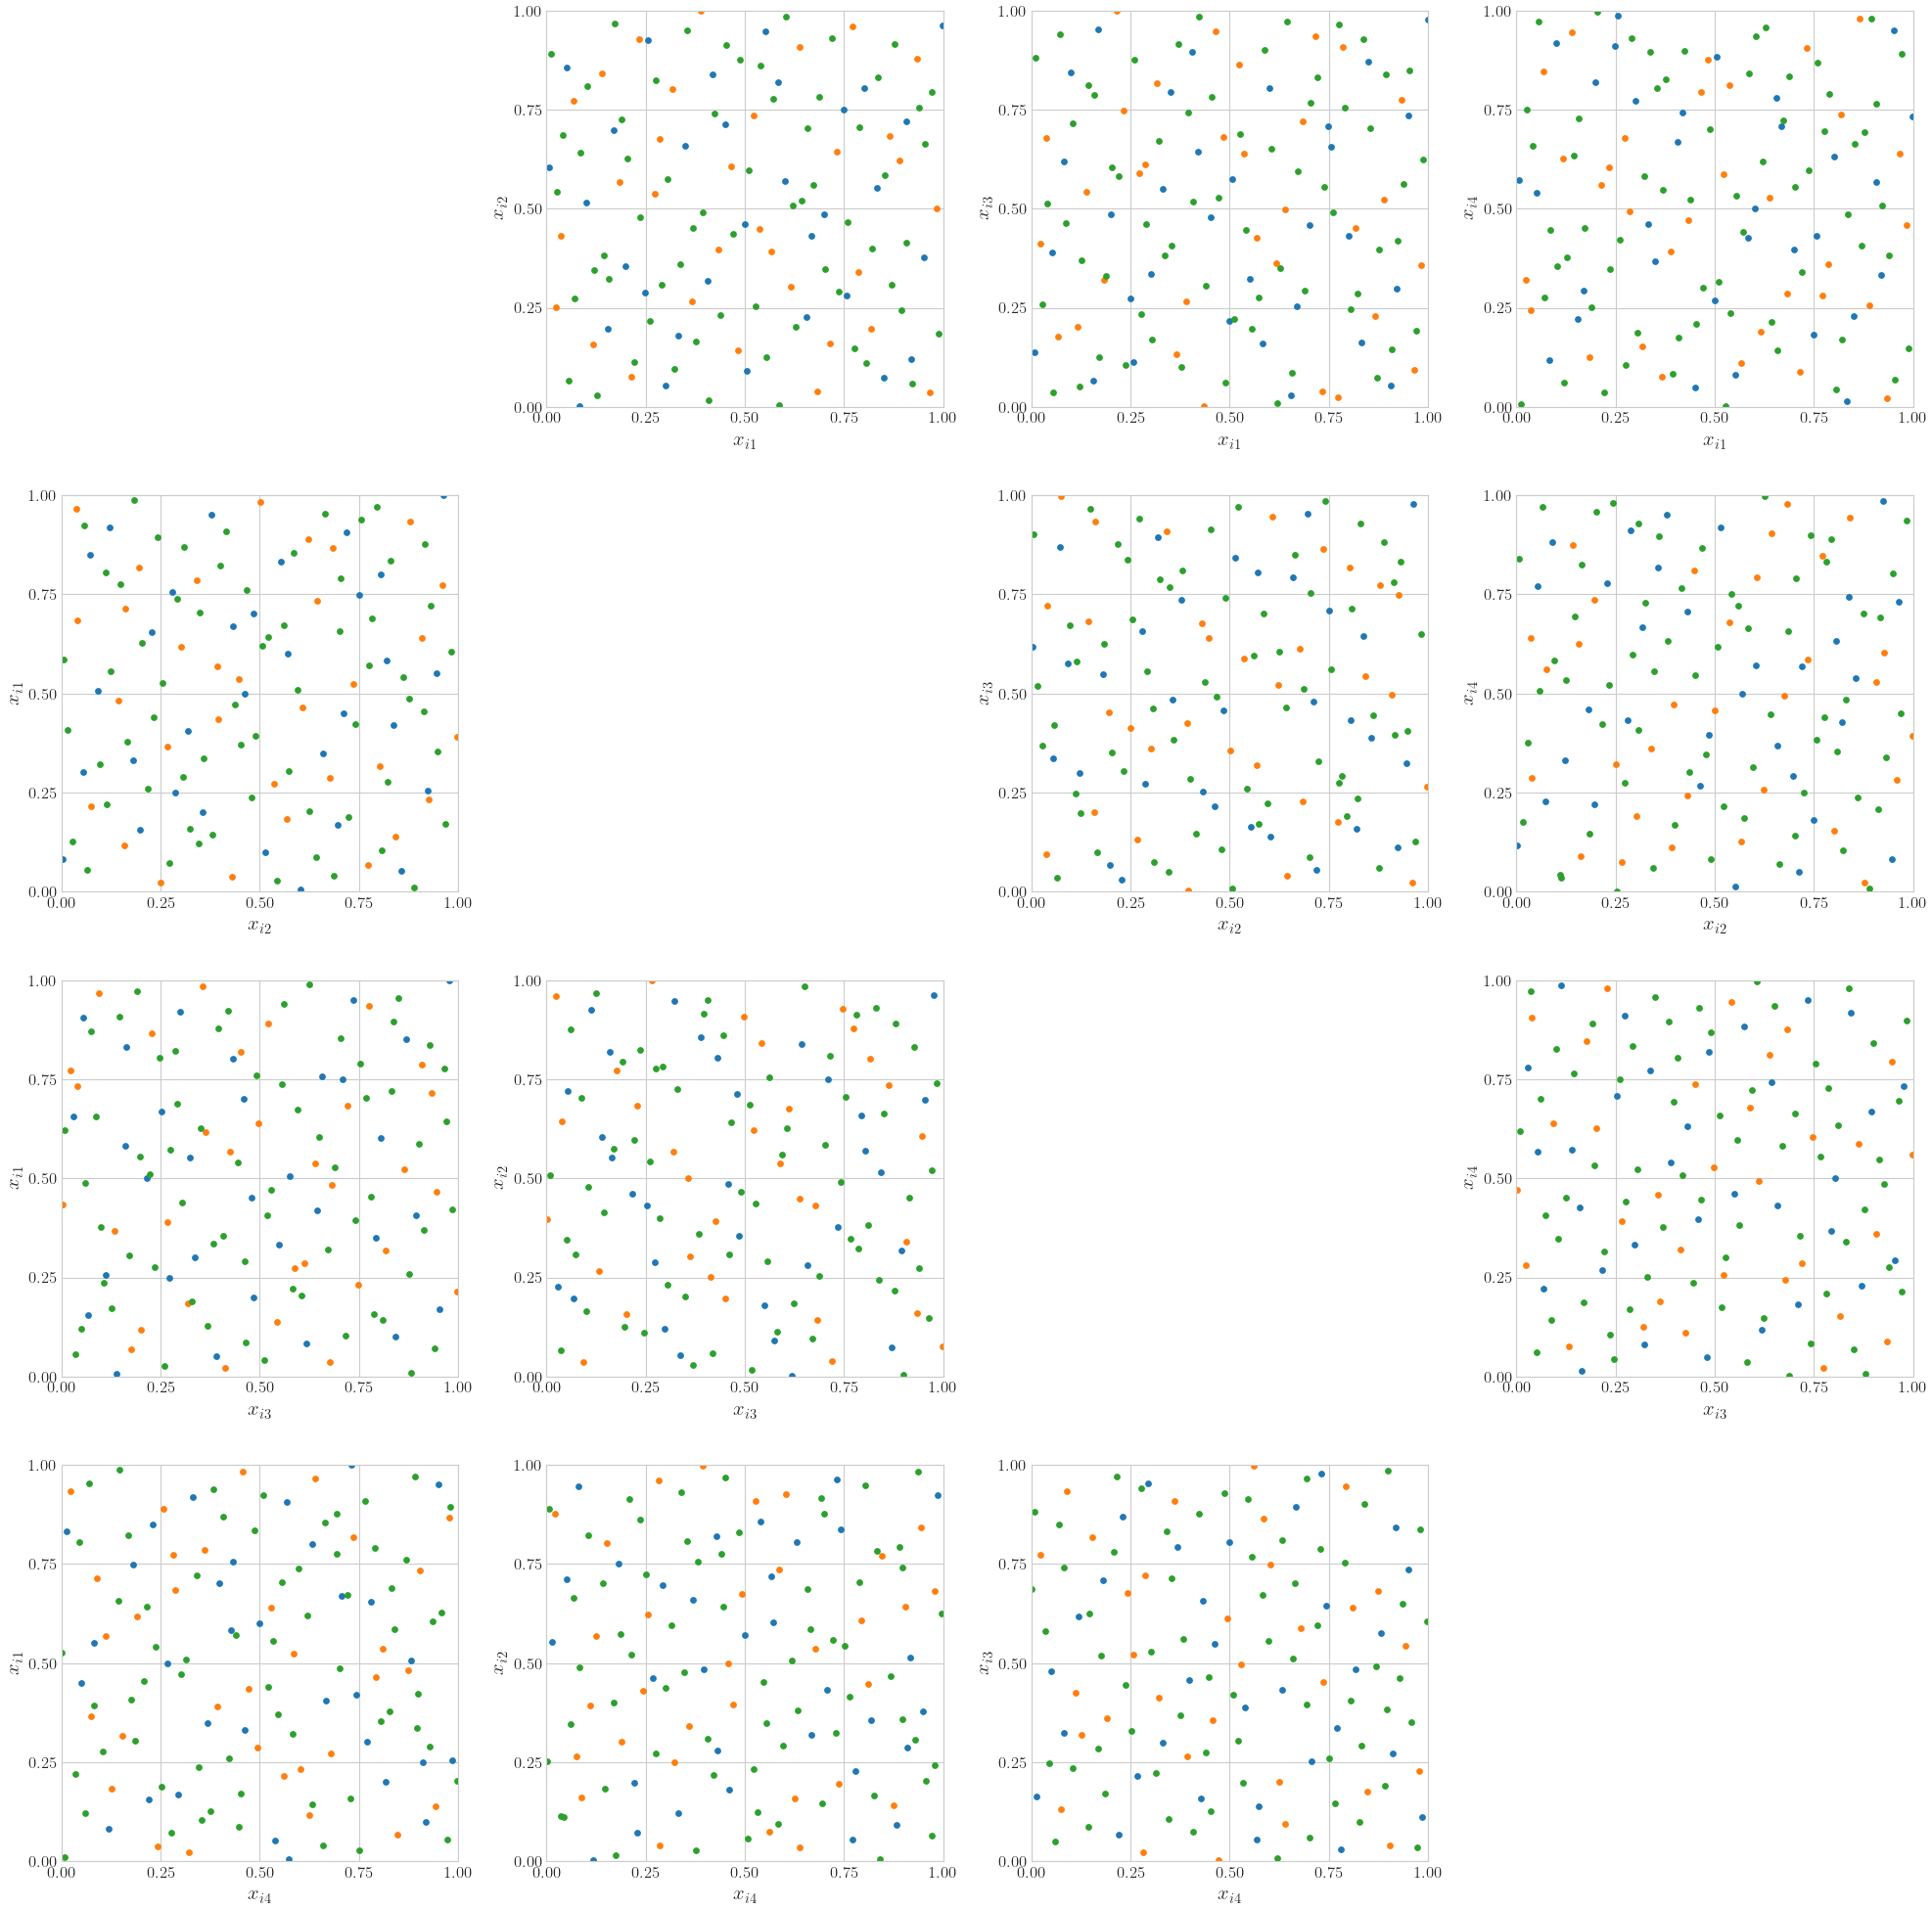

In [26]:
dimension = 4
lms_ds_halton = qp.Halton(dimension, randomize='LMS_DS', generalize=False)
fig,ax = qp.plot_proj(lms_ds_halton, n = [2**5,2**6,2**7], d_horizontal = range(dimension), d_vertical = range(dimension),math_ind = False,marker_size = 15)

### Speed Comparison Between Different Halton Randomize Options:

In [46]:
from time import time
dimension = 25
samples = 10000
rand_options = ['QRNG', 'OWEN', 'LMS', 'DS', 'LMS_DS']
for i in range(len(rand_options)):
    t_start = time()
    rand_halton = qp.Halton(dimension,randomize = rand_options[i], generalize=False).gen_samples(samples,warn=False)
    t_end = time()
    print("Time to generate samples for " + rand_options[i] + "= " + str(t_end - t_start))

Time to generate samples for QRNG= 0.026831865310668945
Time to generate samples for OWEN= 0.11786389350891113
Time to generate samples for LMS= 0.10219359397888184
Time to generate samples for DS= 0.08002996444702148
Time to generate samples for LMS_DS= 0.15324664115905762
